In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    return lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [5]:
def lisa_dtw_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10, distance_function='euclidean'):
    return lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function=distance_function)

In [6]:
def lisa_geo_l(df, df_class, time_series_id, maximize_score='F1-Score'):
    return lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [7]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [8]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [9]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [10]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [11]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Hum1 Single - TS NUMBER
dataset_name = 'Humidity'
ts_names = ['LUZ', 'RGNOT', 'MOA', 'KOP', 'LAG', 'OBR', 'LAE', 'ORO', 'PAY']
ts_name_lisa = 'LUZ'
dimensions = [2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
# TS NUMBER - LISA PEARSON
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
pearson_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_pearson_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    pearson_results.append(result)
    
lisa_pearson_results = np.array(pearson_results)

In [14]:
# TS NUMBER - LISA DTW
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
dtw_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_dtw_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    dtw_results.append(result)
    
lisa_dtw_results = np.array(dtw_results)

In [15]:
# TS NUMBER - LISA GEO
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
geo_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, info = lisa_geo_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    geo_results.append(result)
    
lisa_spatial_results = np.array(geo_results)

In [16]:
# TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [17]:
# TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [18]:
# TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [19]:
# TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)  

In [20]:
# TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [21]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [23]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': array([[0.002, 0.522, 0.076],
       [0.034, 0.205, 0.159],
       [0.092, 0.148, 0.247],
       [0.224, 0.05 , 0.453],
       [0.334, 0.037, 0.567],
       [0.314, 0.04 , 0.545],
       [0.33 , 0.032, 0.569],
       [0.381, 0.027, 0.617]])}, {'title': 'LISA (DTW)', 'scores': array([[0.009, 0.846, 0.072],
       [0.017, 0.34 , 0.115],
       [0.059, 0.226, 0.184],
       [0.114, 0.081, 0.309],
       [0.228, 0.042, 0.462],
       [0.256, 0.042, 0.492],
       [0.331, 0.03 , 0.569],
       [0.358, 0.027, 0.594]])}, {'title': 'LISA (Vanilla)', 'scores': array([[0.013, 0.892, 0.07 ],
       [0.113, 0.045, 0.306],
       [0.244, 0.083, 0.421],
       [0.27 , 0.055, 0.484],
       [0.456, 0.021, 0.68 ],
       [0.477, 0.023, 0.696],
       [0.497, 0.017, 0.683],
       [0.454, 0.022, 0.68 ]])}, {'title': 'RPCA', 'scores': array([[0.014, 0.038, 0.066],
       [0.1  , 0.038, 0.26 ],
       [0.645, 0.015, 0.81 ],
       [0.469, 0.022, 0.692],
       [0.64

In [3]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': np.array([[0.002, 0.522, 0.076],
       [0.034, 0.205, 0.159],
       [0.092, 0.148, 0.247],
       [0.224, 0.05 , 0.453],
       [0.334, 0.037, 0.567],
       [0.314, 0.04 , 0.545],
       [0.33 , 0.032, 0.569],
       [0.381, 0.027, 0.617]])}, {'title': 'LISA (DTW)', 'scores': np.array([[0.009, 0.846, 0.072],
       [0.017, 0.34 , 0.115],
       [0.059, 0.226, 0.184],
       [0.114, 0.081, 0.309],
       [0.228, 0.042, 0.462],
       [0.256, 0.042, 0.492],
       [0.331, 0.03 , 0.569],
       [0.358, 0.027, 0.594]])}, {'title': 'LISA (Vanilla)', 'scores': np.array([[0.013, 0.892, 0.07 ],
       [0.113, 0.045, 0.306],
       [0.244, 0.083, 0.421],
       [0.27 , 0.055, 0.484],
       [0.456, 0.021, 0.68 ],
       [0.477, 0.023, 0.696],
       [0.497, 0.017, 0.683],
       [0.454, 0.022, 0.68 ]])}, {'title': 'RPCA', 'scores': np.array([[0.014, 0.038, 0.066],
       [0.1  , 0.038, 0.26 ],
       [0.645, 0.015, 0.81 ],
       [0.469, 0.022, 0.692],
       [0.64 , 0.012, 0.786],
       [0.581, 0.014, 0.764],
       [0.581, 0.014, 0.753],
       [0.563, 0.015, 0.744]])}, {'title': 'Histogram', 'scores': np.array([[0.024, 0.476, 0.108],
       [0.015, 0.617, 0.089],
       [0.004, 0.541, 0.079],
       [0.003, 0.547, 0.077],
       [0.007, 0.61 , 0.082],
       [0.001, 0.552, 0.072],
       [0.   , 0.527, 0.064],
       [0.   , 0.583, 0.068]])}, {'title': 'Cluster', 'scores': np.array([[0.535, 0.023, 0.724],
       [0.424, 0.023, 0.653],
       [0.547, 0.015, 0.729],
       [0.237, 0.071, 0.434],
       [0.252, 0.058, 0.466],
       [0.169, 0.091, 0.357],
       [0.188, 0.078, 0.387],
       [0.451, 0.02 , 0.667]])}, {'title': 'SVM', 'scores': np.array([[0.469, 0.021, 0.692],
       [0.516, 0.017, 0.713],
       [0.456, 0.02 , 0.674],
       [0.41 , 0.023, 0.639],
       [0.289, 0.035, 0.527],
       [0.246, 0.039, 0.482],
       [0.288, 0.031, 0.521],
       [0.209, 0.039, 0.438]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.474, 0.019, 0.682],
       [0.127, 0.161, 0.267],
       [0.077, 0.248, 0.191],
       [0.073, 0.303, 0.171],
       [0.06 , 0.377, 0.145],
       [0.042, 0.475, 0.119],
       [0.029, 0.507, 0.108],
       [0.048, 0.363, 0.142]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

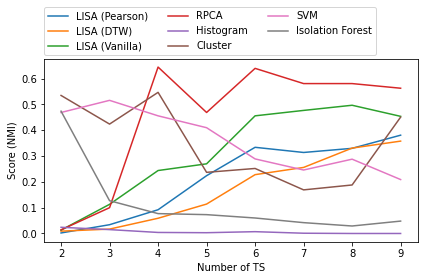

In [7]:
generate_nmi_line_chart(dimensions, scores)

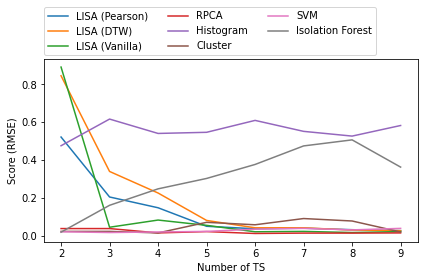

In [8]:
generate_rmse_line_chart(dimensions, scores)

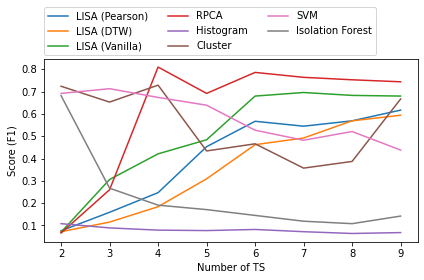

In [9]:
generate_f1_line_chart(dimensions, scores)